In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
from scipy import stats
from scipy.stats import zscore

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

In [3]:
# Load the dataset
# Synthtic data
# df = pd.read_csv(r'data\spotify_2015_2025_85k.csv', sep=',')
# Real data
df = pd.read_csv(r'data\top_10000_1960-now.csv', sep=',')

print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Dataset loaded successfully!
Shape: (9999, 35)
Memory usage: 15.42 MB


In [5]:
# Display first few rows
df.head(5)

,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Album Image URL,Disc Number,Track Number,Track Duration (ms),Track Preview URL,Explicit,Popularity,ISRC,Added By,Added At,Artist Genres,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Album Genres,Label,Copyrights
0,spotify:track:1XAZlnVtthcDZt2NI1Dtxo,Justified & Ancient - Stand by the Jams,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,spotify:album:4MC0ZjNtVP1nDD5lsLxFjc,Songs Collection,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,1992-08-03,https://i.scdn.co/image/ab67616d0000b27355346b...,1,3,216270,NaN,False,0,QMARG1760056,spotify:user:bradnumber1,2020-03-05T09:20:39Z,"acid house,ambient house,big beat,hip house",0.617,0.872,8.0,-12.305,1.0,0.0480,0.0158,0.112000,0.4080,0.504,111.458,4.0,NaN,Jams Communications,"C 1992 Copyright Control, P 1992 Jams Communic..."
1,spotify:track:6a8GbQIlV8HBUW3c6Uk9PH,I Know You Want Me (Calle Ocho),spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,spotify:album:5xLAcbvbSAlRtPXnKkggXA,Pitbull Starring In Rebelution,spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,2009-10-23,https://i.scdn.co/image/ab67616d0000b27326d73a...,1,3,237120,https://p.scdn.co/mp3-preview/d6f8883fc955cb0e...,False,64,USJAY0900144,spotify:user:bradnumber1,2021-08-08T09:26:31Z,"dance pop,miami hip hop,pop",0.825,0.743,2.0,-5.995,1.0,0.1490,0.0142,0.000021,0.2370,0.800,127.045,4.0,NaN,Mr.305/Polo Grounds Music/J Records,"P (P) 2009 RCA/JIVE Label Group, a unit of Son..."
2,spotify:track:70XtWbcVZcpaOddJftMcVi,From the Bottom of My Broken Heart,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,spotify:album:3WNxdumkSMGMJRhEgK80qx,...Baby One More Time (Digital Deluxe Version),spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,1999-01-12,https://i.scdn.co/image/ab67616d0000b2738e4986...,1,6,312533,https://p.scdn.co/mp3-preview/1de5faef947224dc...,False,56,USJI19910455,spotify:user:bradnumber1,2021-08-08T09:26:31Z,"dance pop,pop",0.677,0.665,7.0,-5.171,1.0,0.0305,0.5600,0.000001,0.3380,0.706,74.981,4.0,NaN,Jive,P (P) 1999 Zomba Recording LLC
3,spotify:track:1NXUWyPJk5kO6DQJ5t7bDu,Apeman - 2014 Remastered Version,spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,spotify:album:6lL6HugNEN4Vlc8sj0Zcse,"Lola vs. Powerman and the Moneygoround, Pt. On...",spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,2014-10-20,https://i.scdn.co/image/ab67616d0000b2731e7c53...,1,11,233400,https://p.scdn.co/mp3-preview/c4df3a832509cc55...,False,42,GB5KW1499822,spotify:user:bradnumber1,2021-08-08T09:26:31Z,"album rock,art rock,british invasion,classic r...",0.683,0.728,9.0,-8.920,1.0,0.2590,0.5680,0.000051,0.0384,0.833,75.311,4.0,NaN,Sanctuary Records,"C © 2014 Sanctuary Records Group Ltd., a BMG C..."
4,spotify:track:72WZtWs6V7uu3aMgMmEkYe,You Can't Always Get What You Want,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,spotify:album:0c78nsgqX6VfniSNWIxwoD,Let It Bleed,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,1969-12-05,https://i.scdn.co/image/ab67616d0000b27373d927...,1,9,448720,NaN,False,0,USA176910100,spotify:user:bradnumber1,2021-08-08T09:26:31Z,"album rock,british invasion,classic rock,rock",0.319,0.627,0.0,-9.611,1.0,0.0687,0.6750,0.000073,0.2890,0.497,85.818,4.0,NaN,Universal Music Group,"C © 2002 ABKCO Music & Records Inc., P ℗ 2002 ..."


In [6]:
# Display basic information about the dataset
print("=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)
df.info()

DATASET OVERVIEW
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Track URI             9999 non-null   object 
 1   Track Name            9998 non-null   object 
 2   Artist URI(s)         9997 non-null   object 
 3   Artist Name(s)        9998 non-null   object 
 4   Album URI             9997 non-null   object 
 5   Album Name            9998 non-null   object 
 6   Album Artist URI(s)   9997 non-null   object 
 7   Album Artist Name(s)  9997 non-null   object 
 8   Album Release Date    9997 non-null   object 
 9   Album Image URL       9995 non-null   object 
 10  Disc Number           9999 non-null   int64  
 11  Track Number          9999 non-null   int64  
 12  Track Duration (ms)   9999 non-null   int64  
 13  Track Preview URL     7102 non-null   object 
 14  Explicit              9999 non-null   bool   
 15  Popu

In [7]:
# Display column names and data types
print("\nColumn Names and Types:")
print("-" * 60)
for col in df.columns:
    print(f"{col:20s} : {str(df[col].dtype):15s}")


Column Names and Types:
------------------------------------------------------------
Track URI            : object         
Track Name           : object         
Artist URI(s)        : object         
Artist Name(s)       : object         
Album URI            : object         
Album Name           : object         
Album Artist URI(s)  : object         
Album Artist Name(s) : object         
Album Release Date   : object         
Album Image URL      : object         
Disc Number          : int64          
Track Number         : int64          
Track Duration (ms)  : int64          
Track Preview URL    : object         
Explicit             : bool           
Popularity           : int64          
ISRC                 : object         
Added By             : object         
Added At             : object         
Artist Genres        : object         
Danceability         : float64        
Energy               : float64        
Key                  : float64        
Loudness         

In [44]:
# Check for missing values
def check_missing(df):
    print("\n" + "=" * 60)
    print("MISSING VALUES ANALYSIS")
    print("=" * 60)
    missing_values = df.isnull().sum()
    missing_percent = (missing_values / len(df)) * 100
    missing_df = pd.DataFrame({
        'Missing Count': missing_values,
        'Percentage': missing_percent
    })
    missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
    if len(missing_df) > 0:
        print(missing_df)
    else:
        print("No missing values found!")

check_missing(df)


MISSING VALUES ANALYSIS
                      Missing Count  Percentage
Track Preview URL              2897   28.972897
Artist Genres                   550    5.500550
Label                             6    0.060006
Album Image URL                   4    0.040004
Loudness                          2    0.020002
Time Signature                    2    0.020002
Tempo                             2    0.020002
Valence                           2    0.020002
Liveness                          2    0.020002
Instrumentalness                  2    0.020002
Acousticness                      2    0.020002
Speechiness                       2    0.020002
Mode                              2    0.020002
Energy                            2    0.020002
Key                               2    0.020002
Artist URI(s)                     2    0.020002
Danceability                      2    0.020002
Album Release Date                2    0.020002
Album Artist Name(s)              2    0.020002
Album Artist UR

In [9]:
# Check for duplicate rows
print("\n" + "=" * 60)
print("DUPLICATE ROWS ANALYSIS")
print("=" * 60)
duplicate_count = df.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")
print(f"Percentage of duplicates: {(duplicate_count/len(df))*100:.2f}%")


DUPLICATE ROWS ANALYSIS
Total duplicate rows: 48
Percentage of duplicates: 0.48%


In [10]:
# Statistical summary for numerical columns
print("\n" + "=" * 60)
print("STATISTICAL SUMMARY - NUMERICAL COLUMNS")
print("=" * 60)
numerical_cols = df.select_dtypes(include=[np.number]).columns
df[numerical_cols].describe()


STATISTICAL SUMMARY - NUMERICAL COLUMNS


,Disc Number,Track Number,Track Duration (ms),Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Album Genres
count,9999.000000,9999.000000,9.999000e+03,9999.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,0.0
mean,1.035104,4.957096,2.248150e+05,37.624662,0.607925,0.683281,5.167750,-7.269217,0.698410,0.065138,0.208589,0.029331,0.185777,0.585459,121.496650,3.960488,NaN
std,0.327856,5.502810,5.410012e+04,29.460808,0.145869,0.191131,3.578392,3.281731,0.458971,0.061324,0.248842,0.123576,0.149194,0.239105,26.260686,0.250927,NaN
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000020,0.000000,-29.368000,0.000000,0.000000,0.000003,0.000000,0.012000,0.000000,0.000000,0.000000,NaN
25%,1.000000,1.000000,1.925795e+05,0.000000,0.515000,0.560000,2.000000,-9.070000,0.000000,0.033100,0.018400,0.000000,0.089200,0.398000,102.642000,4.000000,NaN
50%,1.000000,3.000000,2.199060e+05,42.000000,0.617000,0.712000,5.000000,-6.518000,1.000000,0.042900,0.095600,0.000006,0.128000,0.598000,120.653000,4.000000,NaN
75%,1.000000,7.000000,2.502600e+05,64.000000,0.710000,0.835000,8.000000,-4.887000,1.000000,0.067500,0.318000,0.000561,0.245000,0.783000,134.328000,4.000000,NaN
max,15.000000,93.000000,1.561133e+06,98.000000,0.988000,0.997000,11.000000,2.769000,1.000000,0.711000,0.991000,0.985000,0.989000,0.995000,217.913000,5.000000,NaN


In [12]:
# Statistical summary for categorical columns
print("\n" + "=" * 60)
print("STATISTICAL SUMMARY - CATEGORICAL COLUMNS")
print("=" * 60)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Top 5 values:")
    print(df[col].value_counts().head())


STATISTICAL SUMMARY - CATEGORICAL COLUMNS

Track URI:
  Unique values: 9951
  Top 5 values:
Track URI
spotify:track:7hQJA50XrCWABAu5v6QZ4i    3
spotify:track:4alHo6RGd0D3OUbTPExTHN    3
spotify:track:39shmbIHICJ2Wxnk1fPSdz    2
spotify:track:5UwbnHhjnbinJH8TefuQfN    2
spotify:track:43DeSV93pJPT4lCZaWZ6b1    2
Name: count, dtype: int64

Track Name:
  Unique values: 8258
  Top 5 values:
Track Name
One                      9
Stay                     7
How Deep Is Your Love    7
Sorry                    7
Home                     6
Name: count, dtype: int64

Artist URI(s):
  Unique values: 4134
  Top 5 values:
Artist URI(s)
spotify:artist:06HL4z0CvFAxyc27GXpf02    48
spotify:artist:1KCSPY1glIKqW2TotWuXOR    45
spotify:artist:43ZHCT0cAZBISjO8DG9PnE    42
spotify:artist:6eUKZXaKkcviH0Ku9w2n3V    40
spotify:artist:6tbjWDEIzxoDsBA1FuhfPW    39
Name: count, dtype: int64

Artist Name(s):
  Unique values: 4129
  Top 5 values:
Artist Name(s)
Taylor Swift     48
P!nk             45
Elvis Presley 

# DATA CLEANING

In [ ]:
# Dropping the Album Genre column as it is empty and other unnecessary columns
columns_to_drop = ['Copyrights', 'Album Genres', 'Added At', 'Added By', 'ISRC']
df = df.drop(columns=columns_to_drop)

In [ ]:
# Lowercasing the column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [70]:
# Check for missing values
check_missing(df)


MISSING VALUES ANALYSIS
                      Missing Count  Percentage
track_preview_url              2897   28.972897
artist_genres                   550    5.500550
label                             6    0.060006
album_image_url                   4    0.040004
loudness                          2    0.020002
time_signature                    2    0.020002
tempo                             2    0.020002
valence                           2    0.020002
liveness                          2    0.020002
instrumentalness                  2    0.020002
acousticness                      2    0.020002
speechiness                       2    0.020002
mode                              2    0.020002
energy                            2    0.020002
key                               2    0.020002
artist_uri(s)                     2    0.020002
danceability                      2    0.020002
album_release_date                2    0.020002
album_artist_name(s)              2    0.020002
album_artist_ur

In [54]:
# Create a copy for cleaning
df_clean = df.copy()
print(f"Original dataset shape: {df_clean.shape}")

# Remove duplicate rows
df_clean = df_clean.drop_duplicates()
print(f"After removing duplicates: {df_clean.shape}")

print(f"Final cleaned dataset shape: {df_clean.shape}")
print(f"Rows removed: {len(df) - len(df_clean)}")

Original dataset shape: (9999, 30)
After removing duplicates: (9951, 30)
Final cleaned dataset shape: (9951, 30)
Rows removed: 48


In [75]:
# Handle missing values in track_name and album_name
subset_columns = [
    'loudness',
    'time_signature',
    'tempo',
    'valence',
    'liveness',
    'instrumentalness',
    'acousticness',
    'speechiness',
    'mode',
    'energy',
    'key',
    'artist_uri(s)',
    'danceability',
    'album_release_date',
    'album_artist_name(s)',
    'album_artist_uri(s)',
    'album_uri',
    'album_name',
    'artist_name(s)',
    'track_name'
]
df_clean = df_clean.dropna(subset=subset_columns)
check_missing(df_clean)


MISSING VALUES ANALYSIS
                   Missing Count  Percentage
track_preview_url           2485   28.955954
artist_genres                443    5.161967
album_image_url                1    0.011652
label                          1    0.011652


In [78]:
# Convert release_date to datetime
df_clean['album_release_date'] = pd.to_datetime(df_clean['album_release_date'], errors='coerce')

# Extract year, month, quarter, week, and day of week from release_date
df_clean['release_year'] = df_clean['album_release_date'].dt.year
df_clean['release_month'] = df_clean['album_release_date'].dt.month
df_clean['release_quarter'] = df_clean['album_release_date'].dt.quarter
df_clean['release_week'] = df_clean['album_release_date'].dt.isocalendar().week
df_clean['release_day_of_week'] = df_clean['album_release_date'].dt.day_name()

# Convert duration_ms to minutes for better readability
df_clean['track_duration_min'] = df_clean['track_duration_(ms)'] / 60000

print("Date conversion completed!")
print(f"Date range: {df_clean['album_release_date'].min()} to {df_clean['album_release_date'].max()}")
print(f"\nNew date features added:")
print(f"  - release_quarter: {df_clean['release_quarter'].nunique()} unique quarters")
print(f"  - release_week: {df_clean['release_week'].nunique()} unique weeks")
print(f"  - release_day_of_week: {df_clean['release_day_of_week'].nunique()} unique days")

Date conversion completed!
Date range: 1956-03-23 00:00:00 to 2023-06-30 00:00:00

New date features added:
  - release_quarter: 4 unique quarters
  - release_week: 53 unique weeks
  - release_day_of_week: 7 unique days


In [79]:
df_clean.columns

Index(['track_uri', 'track_name', 'artist_uri(s)', 'artist_name(s)',
       'album_uri', 'album_name', 'album_artist_uri(s)',
       'album_artist_name(s)', 'album_release_date', 'album_image_url',
       'disc_number', 'track_number', 'track_duration_(ms)',
       'track_preview_url', 'explicit', 'popularity', 'artist_genres',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'label', 'release_year', 'release_month',
       'release_quarter', 'release_week', 'release_day_of_week',
       'track_duration_min'],
      dtype='object')

In [81]:
# Detect and handle outliers using IQR method for numerical columns
print("=" * 60)
print("OUTLIER DETECTION")
print("=" * 60)

outlier_cols = ['popularity', 'danceability', 'energy', 'loudness', 'tempo', 'speechiness',
                'track_duration_min', 'instrumentalness', 'liveness', 'valence', 'acousticness']

outlier_info = {}
for col in outlier_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
    outlier_info[col] = {
        'count': len(outliers),
        'percentage': (len(outliers)/len(df_clean))*100,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }
    print(f"{col:20s}: {len(outliers):6d} outliers ({len(outliers)/len(df_clean)*100:5.2f}%)")

# Note: We'll keep outliers for analysis but be aware of them

OUTLIER DETECTION
popularity          :      0 outliers ( 0.00%)
danceability        :     63 outliers ( 0.73%)
energy              :     56 outliers ( 0.65%)
loudness            :    222 outliers ( 2.59%)
tempo               :    201 outliers ( 2.34%)
speechiness         :    928 outliers (10.81%)
track_duration_min  :    250 outliers ( 2.91%)
instrumentalness    :   1811 outliers (21.10%)
liveness            :    431 outliers ( 5.02%)
valence             :      0 outliers ( 0.00%)
acousticness        :    509 outliers ( 5.93%)


# EXPLORATORY DATA ANALYSIS (EDA)

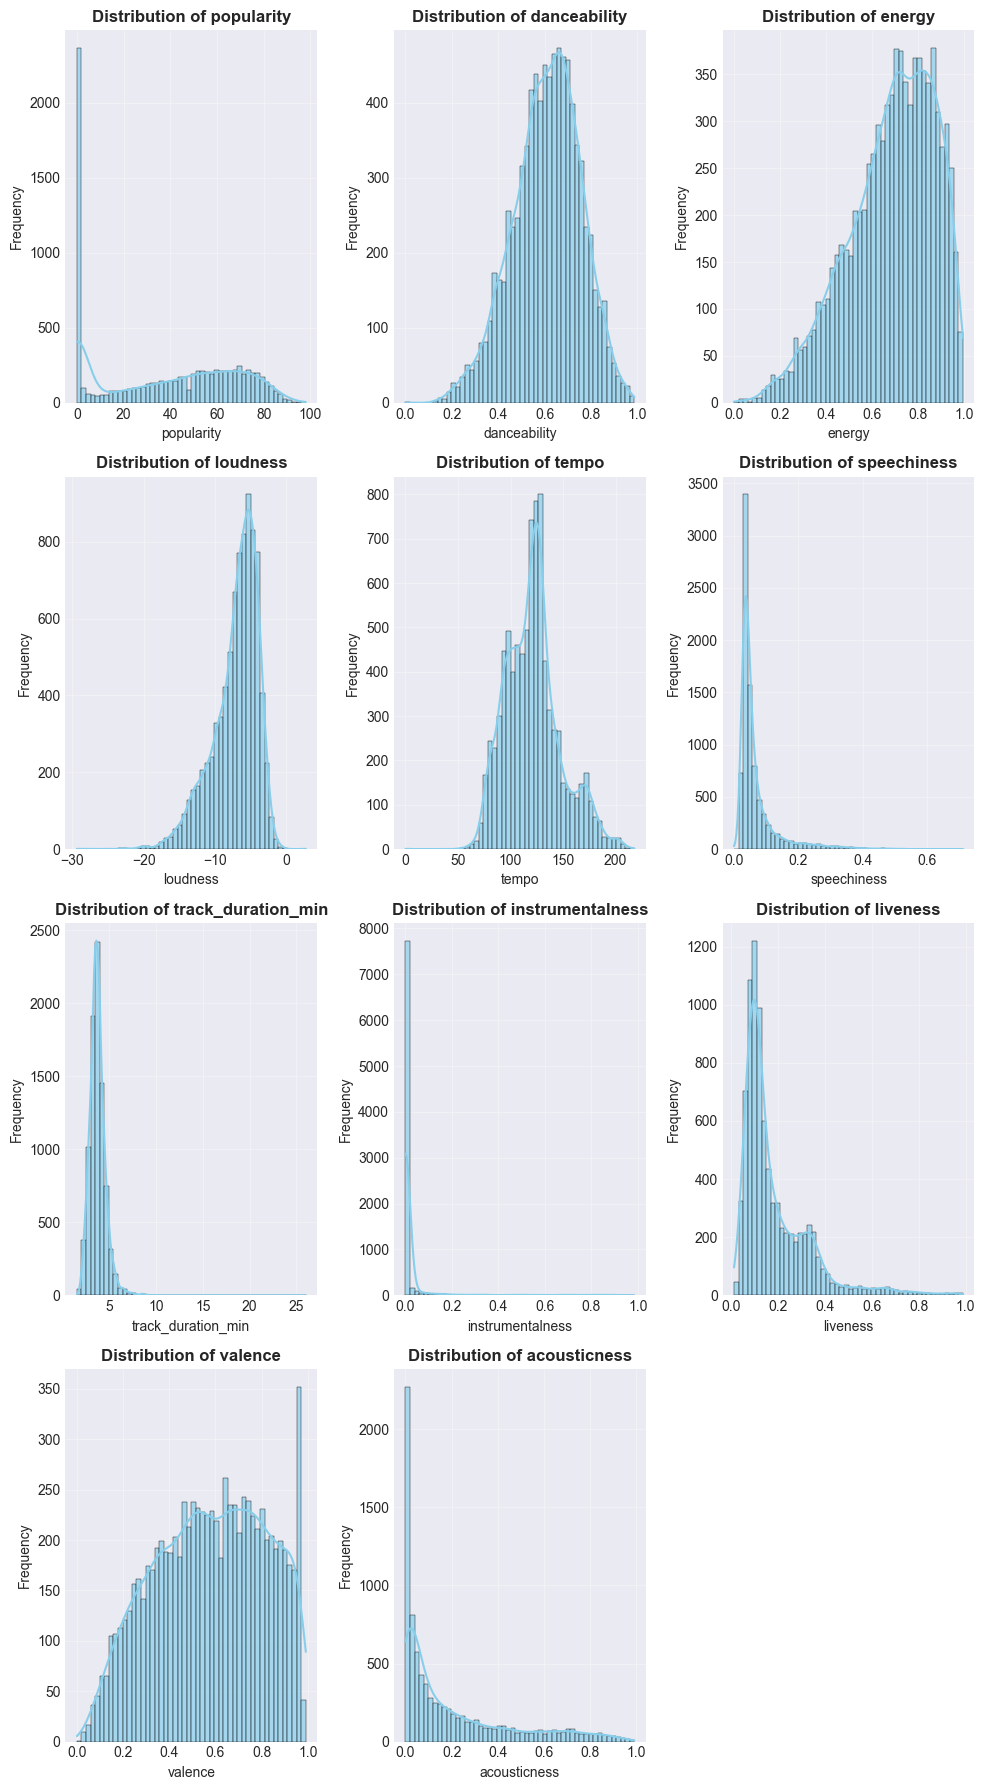

In [85]:
# Distribution of numerical features
fig, axes = plt.subplots(4, 3, figsize=(10, 18))
axes = axes.ravel()

numerical_features = ['popularity', 'danceability', 'energy', 'loudness', 'tempo', 'speechiness',
                'track_duration_min', 'instrumentalness', 'liveness', 'valence', 'acousticness']

for idx, feature in enumerate(numerical_features):
    data = df_clean[feature].dropna()
    
    # Use log scale for stream_count
    if feature == 'stream_count':
        data = np.log10(data[data > 0])  # Log10 transformation, exclude zeros
        sns.histplot(data=data, bins=50, kde=True, ax=axes[idx], edgecolor='black', alpha=0.7, color='skyblue')
        axes[idx].set_xlabel(f'{feature} (log10 scale)')
    else:
        sns.histplot(data=data, bins=50, kde=True, ax=axes[idx], edgecolor='black', alpha=0.7, color='skyblue')
        axes[idx].set_xlabel(feature)
    
    axes[idx].set_title(f'Distribution of {feature}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(True, alpha=0.3)

# Hide unused subplots
for idx in range(len(numerical_features), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

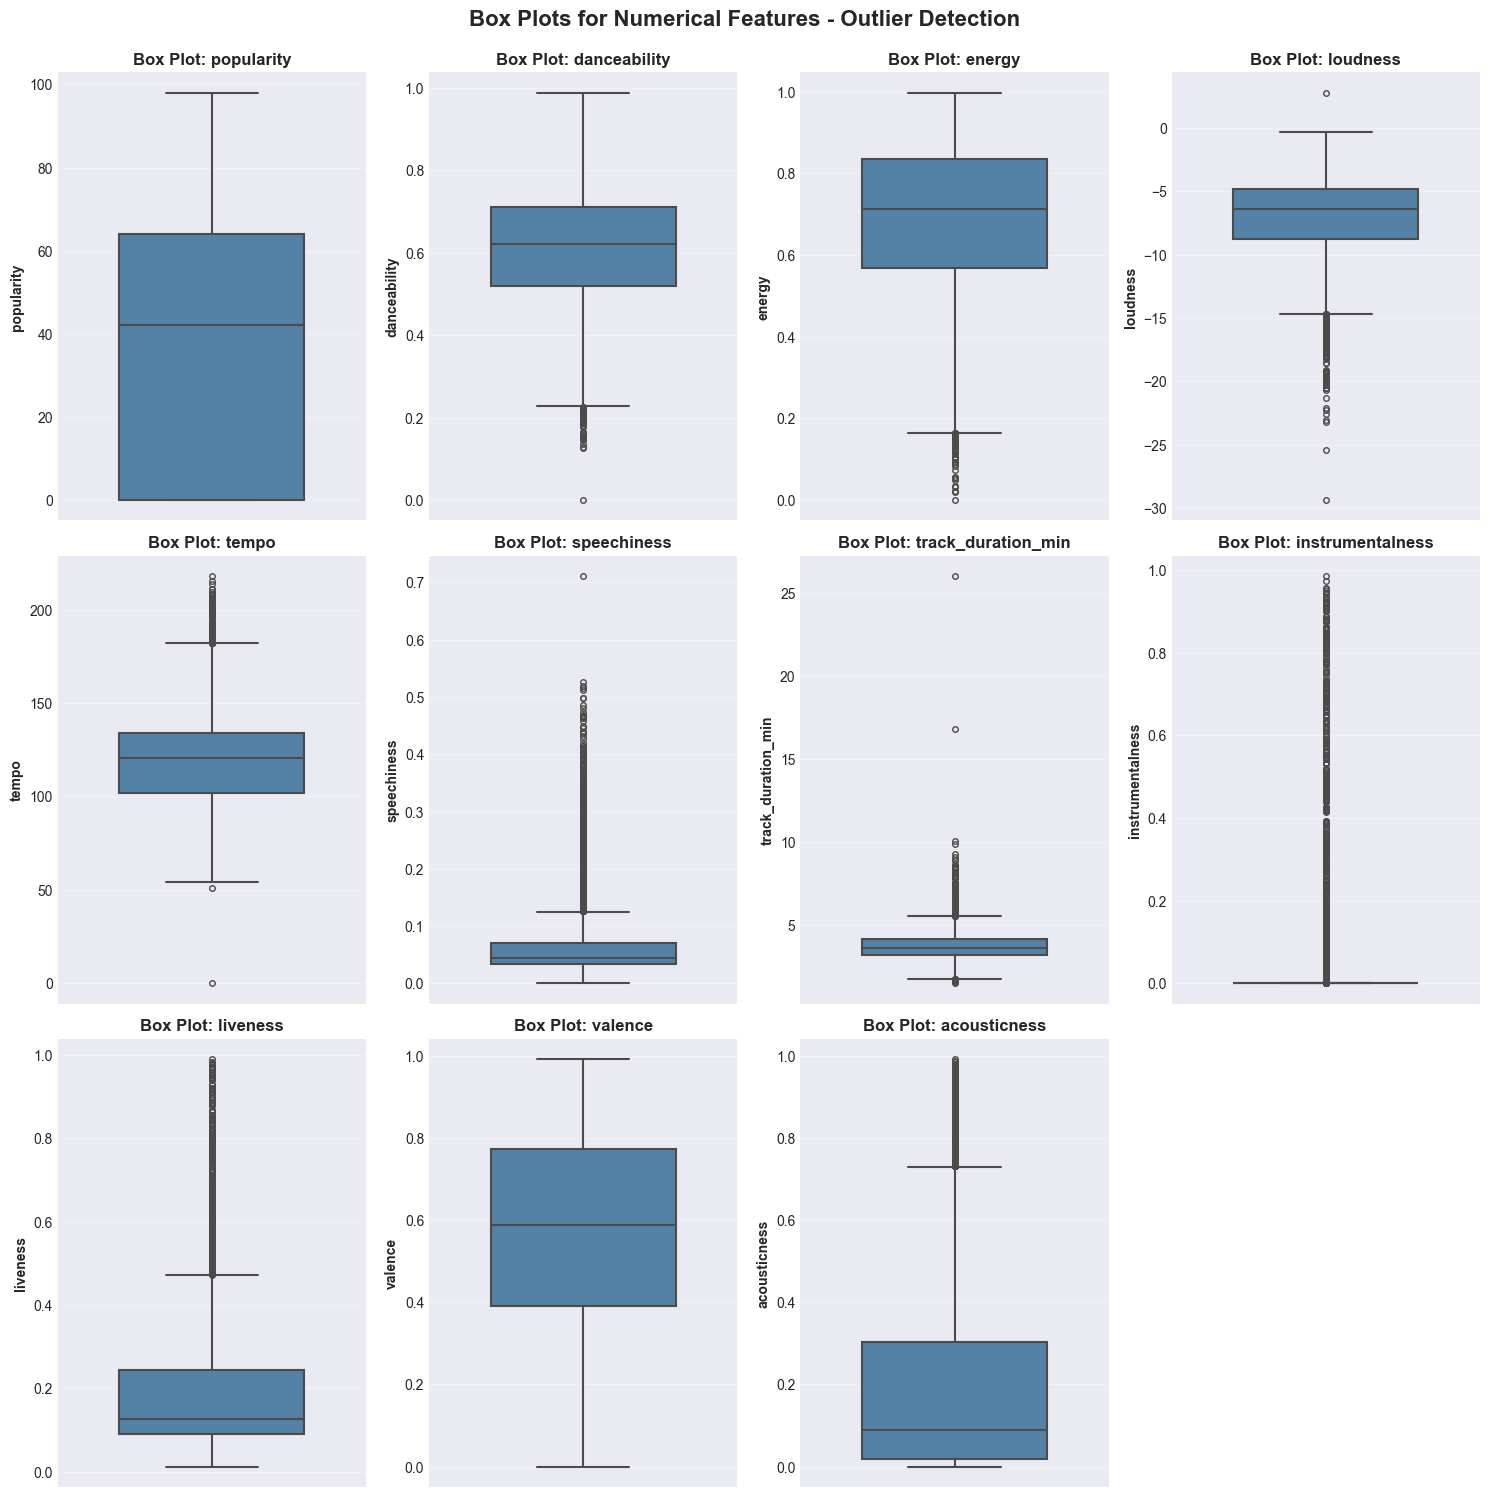

In [87]:
# Box plots for numerical features to identify outliers (using Seaborn)
fig, axes = plt.subplots(3, 4, figsize=(15, 15))
axes = axes.ravel()

for idx, feature in enumerate(numerical_features):
    data = df_clean[feature].dropna()
    # Use seaborn boxplot for better visual appeal
    sns.boxplot(y=data, ax=axes[idx], color='steelblue', width=0.6, 
                linewidth=1.5, fliersize=4)
    axes[idx].set_title(f'Box Plot: {feature}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(feature, fontsize=10, fontweight='bold')
    axes[idx].grid(True, alpha=0.3, axis='y')
    axes[idx].set_xlabel('')  # Remove x-axis label as it's not needed

# Hide unused subplots
for idx in range(len(numerical_features), len(axes)):
    axes[idx].axis('off')

plt.suptitle('Box Plots for Numerical Features - Outlier Detection', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

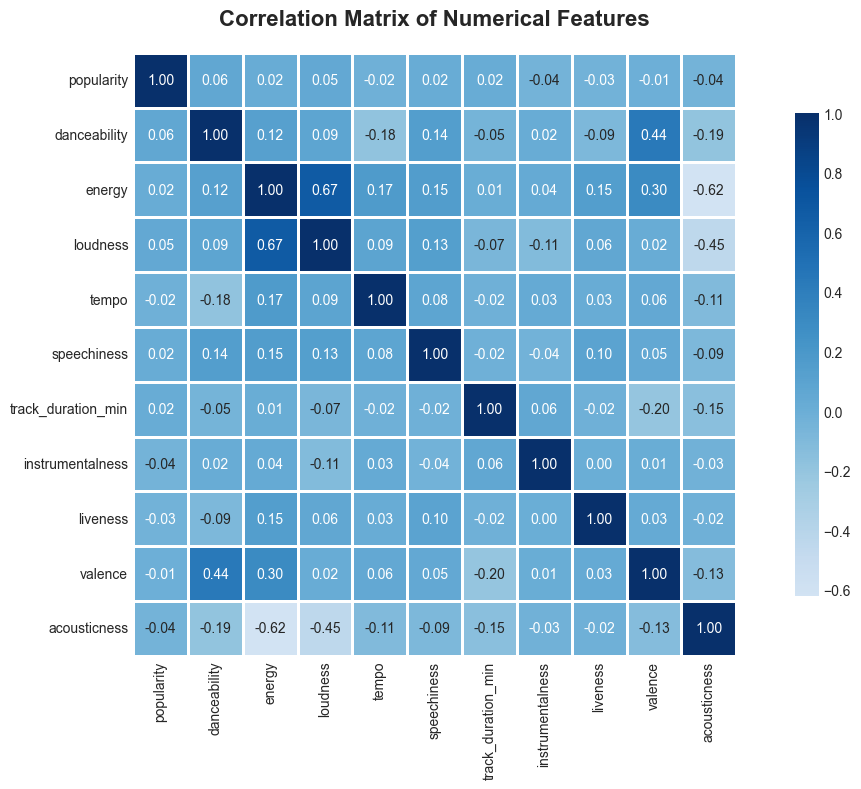

In [97]:
# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df_clean[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='Blues', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [110]:
df_clean.columns

Index(['track_uri', 'track_name', 'artist_uri(s)', 'artist_name(s)',
       'album_uri', 'album_name', 'album_artist_uri(s)',
       'album_artist_name(s)', 'album_release_date', 'album_image_url',
       'disc_number', 'track_number', 'track_duration_(ms)',
       'track_preview_url', 'explicit', 'popularity', 'artist_genres',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'label', 'release_year', 'release_month',
       'release_quarter', 'release_week', 'release_day_of_week',
       'track_duration_min'],
      dtype='object')

album_artist_name(s)
Various Artists       371
Taylor Swift           50
Elvis Presley          43
Ed Sheeran             43
P!nk                   41
Madonna                40
U2                     39
Justin Bieber          38
The Beatles            37
Maroon 5               35
Rihanna                34
Katy Perry             33
The Rolling Stones     33
Eminem                 31
Ariana Grande          30
Name: count, dtype: int64

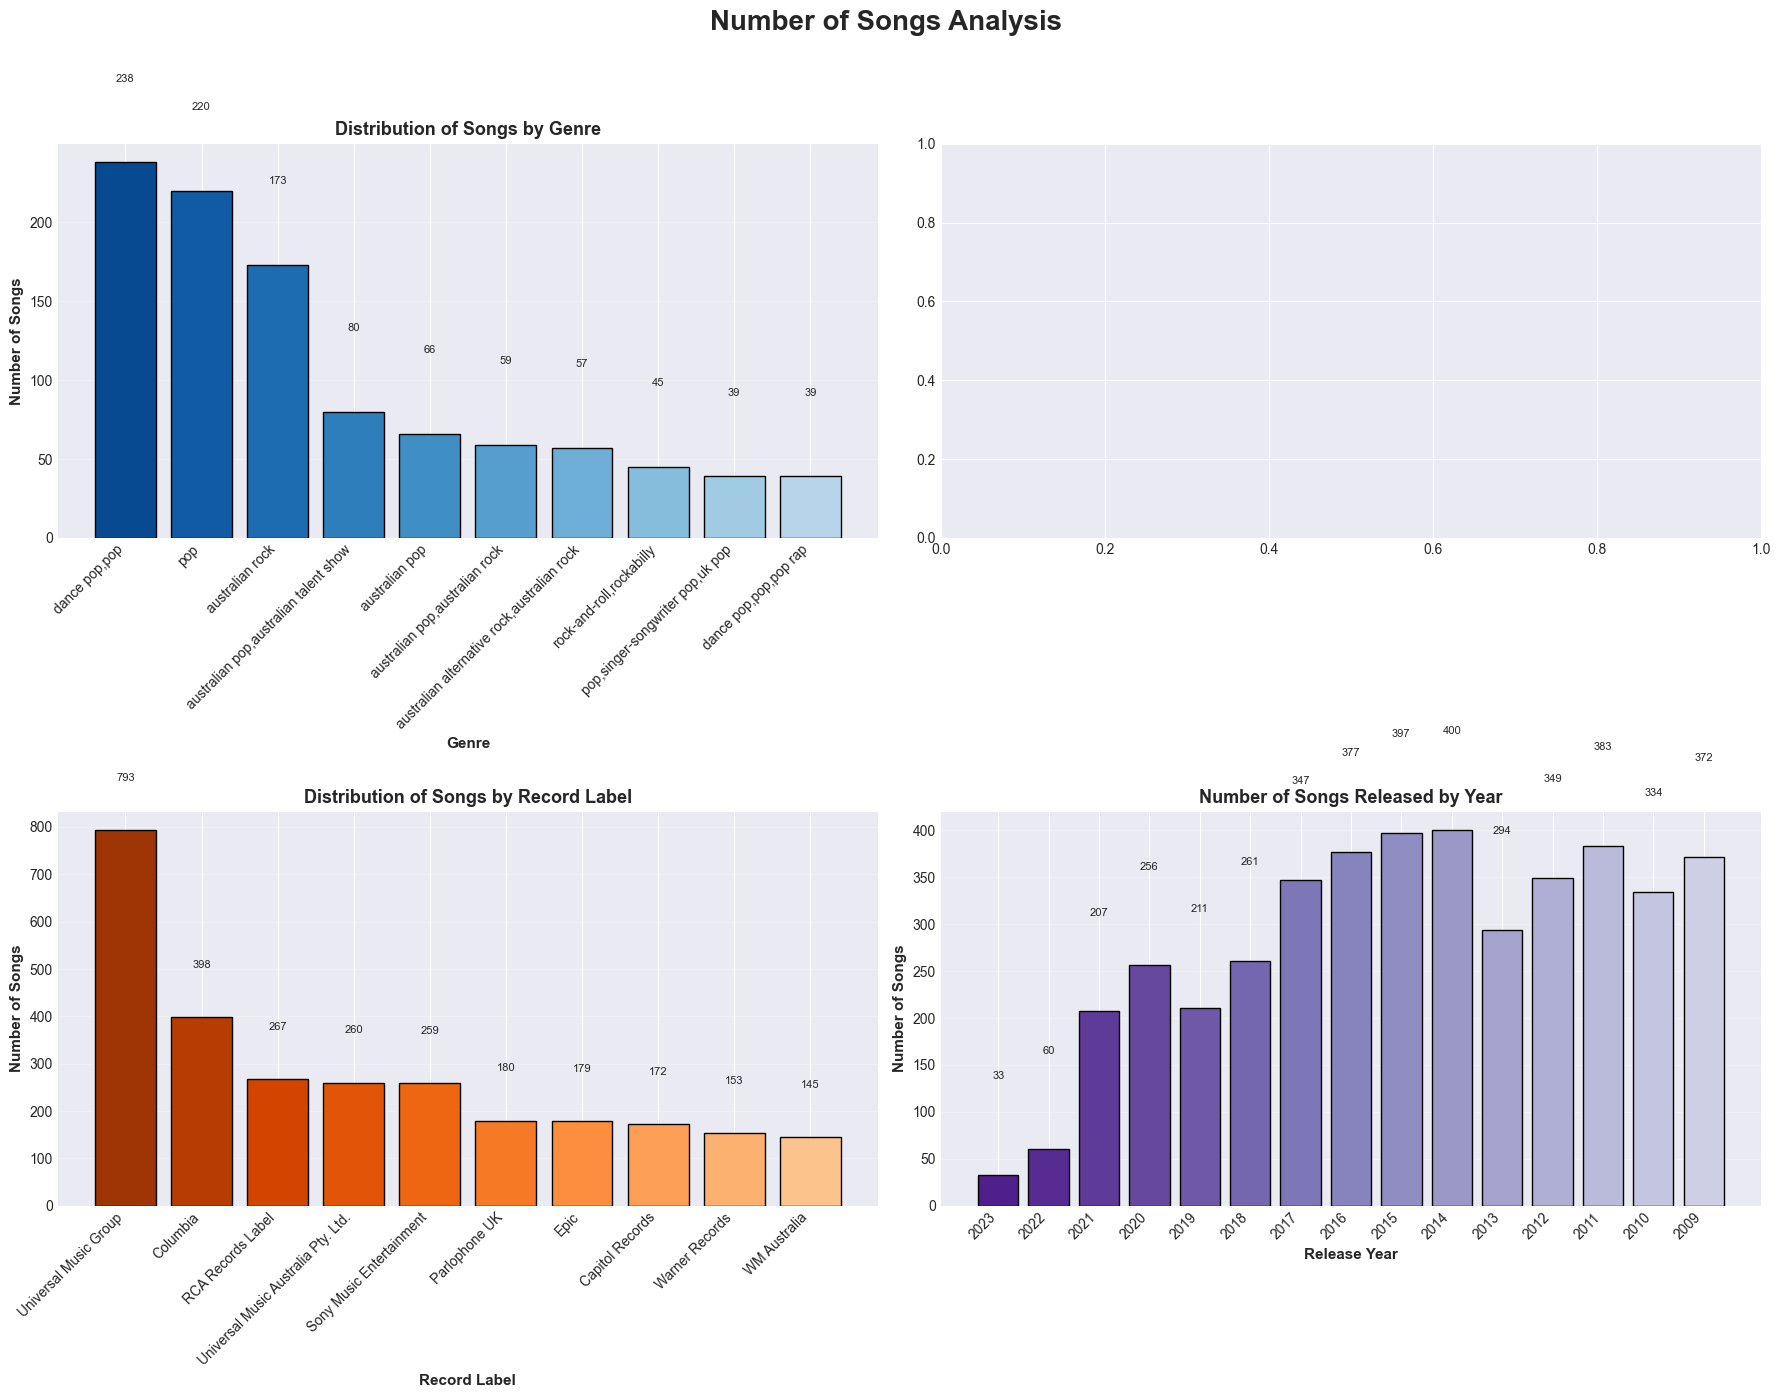

In [122]:
# Number of Songs Analysis - Combined Visualization
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Number of Songs Analysis', fontsize=20, fontweight='bold', y=0.995)

# 1. Genre distribution (Top Left)
genre_counts = df_clean['artist_genres'].value_counts()[:10]
colors_genre = plt.cm.Blues(np.linspace(0.9, 0.3, len(genre_counts)))
bars1 = axes[0, 0].bar(range(len(genre_counts)), genre_counts.values, color=colors_genre, edgecolor='black')
axes[0, 0].set_xlabel('Genre', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Number of Songs', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Distribution of Songs by Genre', fontsize=13, fontweight='bold')
axes[0, 0].set_xticks(range(len(genre_counts)))
axes[0, 0].set_xticklabels(genre_counts.index, rotation=45, ha='right')
axes[0, 0].grid(axis='y', alpha=0.3)
for i, (bar, count) in enumerate(zip(bars1, genre_counts.values)):
    axes[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50,
                    f'{count:,}', ha='center', va='bottom', fontsize=8)

# # 2. Top 15 artists (Top Right)
# country_counts = df_clean['artist_name(s)'].value_counts()[:15]
# colors_country = plt.cm.Greens(np.linspace(0.9, 0.3, len(country_counts)))
# bars2 = axes[0, 1].bar(range(len(country_counts)), country_counts.values, color=colors_country, edgecolor='black')
# axes[0, 1].set_xlabel('Country', fontsize=11, fontweight='bold')
# axes[0, 1].set_ylabel('Number of Songs', fontsize=11, fontweight='bold')
# axes[0, 1].set_title('Top 15 Countries by Number of Songs', fontsize=13, fontweight='bold')
# axes[0, 1].set_xticks(range(len(country_counts)))
# axes[0, 1].set_xticklabels(country_counts.index, rotation=45, ha='right')
# axes[0, 1].grid(axis='y', alpha=0.3)
# for i, (bar, count) in enumerate(zip(bars2, country_counts.values)):
#     axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 75,
#                     f'{count:,}', ha='center', va='bottom', fontsize=8)

# 3. Label (Record Label) distribution (Bottom Left)
label_counts = df_clean['label'].value_counts()[:10]
colors_label = plt.cm.Oranges(np.linspace(0.9, 0.3, len(label_counts)))
bars3 = axes[1, 0].bar(range(len(label_counts)), label_counts.values, color=colors_label, edgecolor='black')
axes[1, 0].set_xlabel('Record Label', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Number of Songs', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Distribution of Songs by Record Label', fontsize=13, fontweight='bold')
axes[1, 0].set_xticks(range(len(label_counts)))
axes[1, 0].set_xticklabels(label_counts.index, rotation=45, ha='right')
axes[1, 0].grid(axis='y', alpha=0.3)
for i, (bar, count) in enumerate(zip(bars3, label_counts.values)):
    axes[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100,
                    f'{count:,}', ha='center', va='bottom', fontsize=8)

# 4. Songs released by year (Bottom Right) - Converted to bar chart
year_counts = df_clean['release_year'].value_counts().sort_index(ascending=False)[:15]
colors_year = plt.cm.Purples(np.linspace(0.9, 0.3, len(year_counts)))
bars4 = axes[1, 1].bar(range(len(year_counts)), year_counts.values, color=colors_year, edgecolor='black')
axes[1, 1].set_xlabel('Release Year', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Number of Songs', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Number of Songs Released by Year', fontsize=13, fontweight='bold')
axes[1, 1].set_xticks(range(len(year_counts)))
axes[1, 1].set_xticklabels(year_counts.index, rotation=45, ha='right')
axes[1, 1].grid(axis='y', alpha=0.3)
for i, (bar, count) in enumerate(zip(bars4, year_counts.values)):
    axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100,
                    f'{count:,}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

In [ ]:
# Dual Axis Chart: Average Stream Count (Bars) and Average Popularity (Line) by Genre
fig, ax1 = plt.subplots(figsize=(14, 8))

# Get data sorted by stream count (descending)
genre_streams = df_clean.groupby('genre')['stream_count'].mean().sort_values(ascending=False)
genre_popularity = df_clean.groupby('genre')['popularity'].mean()
# Reorder popularity to match stream count order
genre_popularity = genre_popularity.reindex(genre_streams.index)

# Create x positions
x_pos = range(len(genre_streams))

# Left Y-axis: Stream Count (Bars)
color_bars = '#084A91'  # Solid blue
bars = ax1.bar(x_pos, genre_streams.values, color=color_bars, edgecolor='black', alpha=0.7, label='Avg Stream Count')
ax1.set_xlabel('Genre', fontsize=12, fontweight='bold')
ax1.set_ylabel('Average Stream Count', fontsize=12, fontweight='bold', color=color_bars)
ax1.tick_params(axis='y', labelcolor=color_bars)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(genre_streams.index, rotation=45, ha='right')
ax1.grid(False)  # Remove grid lines

# Format y-axis to show values in thousands/millions
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000:.0f}K' if x < 1000000 else f'{x/1000000:.1f}M'))

# Add value labels on bars
for i, (bar, val) in enumerate(zip(bars, genre_streams.values)):
    label = f'{val/1000:.0f}K' if val < 1000000 else f'{val/1000000:.1f}M'
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 500,
             label, ha='center', va='bottom', fontsize=9)

# Right Y-axis: Popularity (Line)
ax2 = ax1.twinx()
color_line = '#e74c3c'  # Solid red
line = ax2.plot(x_pos, genre_popularity.values, color=color_line, marker='o', 
                linewidth=2.5, markersize=8, label='Avg Popularity')
ax2.set_ylabel('Average Popularity', fontsize=12, fontweight='bold', color=color_line)
ax2.tick_params(axis='y', labelcolor=color_line)
ax2.grid(False)  # Remove grid lines

# Add value labels on line points - positioned just above markers, bold and black
for i, (x, val) in enumerate(zip(x_pos, genre_popularity.values)):
    ax2.text(x, val - 0.03, f'{val:.1f}', ha='center', va='bottom', 
             fontsize=10, color='black', fontweight='bold')

# Title
plt.title('Average Stream Count and Popularity by Genre', fontsize=16, fontweight='bold', pad=20)

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
# Relationship between popularity and stream_count
plt.figure(figsize=(12, 8))
plt.scatter(df_clean['popularity'], df_clean['stream_count'], alpha=0.5, s=20, edgecolors='black', linewidth=0.5)
plt.xlabel('Popularity', fontsize=12, fontweight='bold')
plt.ylabel('Stream Count', fontsize=12, fontweight='bold')
plt.title('Popularity vs Stream Count', fontsize=16, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3)

# Add correlation coefficient
correlation = df_clean['popularity'].corr(df_clean['stream_count'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
         transform=plt.gca().transAxes, fontsize=12, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Format y-axis
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000:.0f}K' if x < 1000000 else f'{x/1000000:.1f}M'))

plt.tight_layout()
plt.show()

In [ ]:
# Relationship between danceability and energy
plt.figure(figsize=(12, 8))
plt.scatter(df_clean['danceability'], df_clean['energy'], alpha=0.5, s=20, 
            c=df_clean['popularity'], cmap='viridis', edgecolors='black', linewidth=0.3)
plt.colorbar(label='Popularity')
plt.xlabel('Danceability', fontsize=12, fontweight='bold')
plt.ylabel('Energy', fontsize=12, fontweight='bold')
plt.title('Danceability vs Energy (colored by Popularity)', fontsize=16, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3)

# Add correlation coefficient
correlation = df_clean['danceability'].corr(df_clean['energy'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
         transform=plt.gca().transAxes, fontsize=12, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

In [ ]:
# Explicit content analysis
plt.figure(figsize=(8, 6))
explicit_counts = df_clean['explicit'].value_counts()
labels = ['Non-Explicit', 'Explicit']
colors = ['#66b3ff', '#ff9999']
explode = (0.05, 0.05)

plt.pie(explicit_counts.values, labels=labels, autopct='%1.1f%%', 
        colors=colors, explode=explode, shadow=True, startangle=90,
        textprops={'fontsize': 12, 'fontweight': 'bold'})
plt.title('Distribution of Explicit vs Non-Explicit Content', fontsize=16, fontweight='bold', pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

print(f"\nExplicit songs: {explicit_counts[1]:,} ({(explicit_counts[1]/len(df_clean)*100):.2f}%)")
print(f"Non-explicit songs: {explicit_counts[0]:,} ({(explicit_counts[0]/len(df_clean)*100):.2f}%)")

In [ ]:
# Popularity comparison: Explicit vs Non-Explicit
# OPTION 1: Seaborn Box Plot (Recommended)
explicit_pop = df_clean[df_clean['explicit'] == 1]['popularity']
non_explicit_pop = df_clean[df_clean['explicit'] == 0]['popularity']

# Prepare data for seaborn
df_plot = pd.DataFrame({
    'Popularity': pd.concat([non_explicit_pop, explicit_pop]),
    'Content Type': ['Non-Explicit'] * len(non_explicit_pop) + ['Explicit'] * len(explicit_pop)
})

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_plot, x='Content Type', y='Popularity', 
            palette=['#66b3ff', '#ff9999'], width=0.6)
sns.stripplot(data=df_plot, x='Content Type', y='Popularity', 
              color='black', alpha=0.3, size=2, jitter=True)

# Add mean markers
mean_non_explicit = non_explicit_pop.mean()
mean_explicit = explicit_pop.mean()
plt.plot(0, mean_non_explicit, 'D', color='green', markersize=12, 
         label='Mean', markeredgecolor='black', markeredgewidth=1)
plt.plot(1, mean_explicit, 'D', color='green', markersize=12, 
         markeredgecolor='black', markeredgewidth=1)

plt.ylabel('Popularity', fontsize=12, fontweight='bold')
plt.xlabel('Content Type', fontsize=12, fontweight='bold')
plt.title('Popularity Distribution: Explicit vs Non-Explicit Songs', 
          fontsize=16, fontweight='bold', pad=20)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("OPTION 2: Violin Plot (Alternative Visualization)")
print("="*70)

plt.figure(figsize=(10, 6))
sns.violinplot(data=df_plot, x='Content Type', y='Popularity', 
               palette=['#66b3ff', '#ff9999'], inner='box')
plt.ylabel('Popularity', fontsize=12, fontweight='bold')
plt.xlabel('Content Type', fontsize=12, fontweight='bold')
plt.title('Popularity Distribution: Explicit vs Non-Explicit Songs (Violin Plot)', 
          fontsize=16, fontweight='bold', pad=20)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Statistical test
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(explicit_pop, non_explicit_pop)

print("\n" + "="*70)
print("STATISTICAL TEST RESULTS")
print("="*70)
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Mean Popularity - Explicit Songs: {explicit_pop.mean():.2f}")
print(f"Mean Popularity - Non-Explicit Songs: {non_explicit_pop.mean():.2f}")
print(f"Difference: {abs(explicit_pop.mean() - non_explicit_pop.mean()):.2f}")

print("\n" + "="*70)
print("INTERPRETATION (Easy-to-Understand Explanation)")
print("="*70)
print("""
We compared the popularity scores between explicit and non-explicit songs to see if 
there's a meaningful difference between them.

WHAT WE FOUND:
• The average popularity of explicit songs is {:.2f} out of 100.
• The average popularity of non-explicit songs is {:.2f} out of 100.
• The difference between them is only {:.2f} points, which is very small.

WHAT THIS MEANS:
The p-value of {:.4f} tells us how confident we can be about our findings. 
Think of it like this:
• If the p-value is less than 0.05, we'd say "Yes, there IS a real difference!"
• If the p-value is 0.05 or higher, we'd say "No, there's NO meaningful difference."

In our case, the p-value is {:.4f}, which is much higher than 0.05. This means:

✓ There is NO statistically significant difference in popularity between 
  explicit and non-explicit songs.
  
✓ The tiny difference we see ({:.2f} points) is likely just due to random 
  variation in the data, not because one type is actually more popular than 
  the other.

✓ In simple terms: Whether a song has explicit content or not doesn't appear 
  to make a meaningful difference in how popular it becomes on Spotify.

BOTTOM LINE:
Based on this analysis, we cannot say that explicit songs are more or less 
popular than non-explicit songs. They perform about the same in terms of 
popularity scores.
""".format(explicit_pop.mean(), non_explicit_pop.mean(), 
           abs(explicit_pop.mean() - non_explicit_pop.mean()), 
           p_value, p_value, abs(explicit_pop.mean() - non_explicit_pop.mean())))

In [ ]:
# Top artists by number of songs
plt.figure(figsize=(12, 8))
top_artists = df_clean['artist_name'].value_counts().head(20).sort_values(ascending=True)
# colors_genre = plt.cm.Blues(np.linspace(0.9, 0.3, len(genre_counts)))
colors = plt.cm.Blues(np.linspace(0, 2, len(top_artists)))
bars = plt.barh(range(len(top_artists)), top_artists.values, color=colors, edgecolor='black')
plt.ylabel('Artist', fontsize=12, fontweight='bold')
plt.xlabel('Number of Songs', fontsize=12, fontweight='bold')
plt.title('Top 20 Artists by Number of Songs', fontsize=16, fontweight='bold', pad=20)
plt.yticks(range(len(top_artists)), top_artists.index)
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, count) in enumerate(zip(bars, top_artists.values)):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f'{count}', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
# Duration analysis
plt.figure(figsize=(12, 6))
plt.hist(df_clean['duration_min'], bins=50, edgecolor='black', alpha=0.7, color='#084A91')
plt.axvline(df_clean['duration_min'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df_clean["duration_min"].mean():.2f} min')
plt.axvline(df_clean['duration_min'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df_clean["duration_min"].median():.2f} min')
plt.xlabel('Duration (minutes)', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Distribution of Song Duration', fontsize=16, fontweight='bold', pad=20)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nDuration Statistics:")
print(f"Mean: {df_clean['duration_min'].mean():.2f} minutes")
print(f"Median: {df_clean['duration_min'].median():.2f} minutes")
print(f"Min: {df_clean['duration_min'].min():.2f} minutes")
print(f"Max: {df_clean['duration_min'].max():.2f} minutes")

In [ ]:
# Pair plot for key audio features
key_features = ['popularity', 'danceability', 'energy', 'loudness', 'tempo', 'instrumentalness']
sample_df = df_clean[key_features].sample(n=5000, random_state=42)  # Sample for performance

g = sns.pairplot(sample_df, diag_kind='kde', plot_kws={'alpha': 0.6, 's': 10})
g.fig.suptitle('Pair Plot of Key Audio Features', fontsize=16, fontweight='bold', y=1.02)
plt.show()

In [ ]:
# Mode distribution (Major vs Minor)
plt.figure(figsize=(10, 6))
mode_counts = df_clean['mode'].value_counts()
labels = ['Minor (0)', 'Major (1)']
colors = ['#ff6b6b', '#4ecdc4']
explode = (0.05, 0.05)

plt.pie(mode_counts.values, labels=labels, autopct='%1.1f%%', 
        colors=colors, explode=explode, shadow=True, startangle=90,
        textprops={'fontsize': 12, 'fontweight': 'bold'})
plt.title('Distribution of Major vs Minor Keys', fontsize=16, fontweight='bold', pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

print(f"\nMajor key songs: {mode_counts[1]:,} ({(mode_counts[1]/len(df_clean)*100):.2f}%)")
print(f"Minor key songs: {mode_counts[0]:,} ({(mode_counts[0]/len(df_clean)*100):.2f}%)")

In [ ]:
# Key distribution (musical keys 0-11)
plt.figure(figsize=(14, 6))
key_names = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
key_counts = df_clean['key'].value_counts().sort_index()
bars = plt.bar(range(len(key_counts)), key_counts.values, color='steelblue', edgecolor='black')
plt.xlabel('Musical Key', fontsize=12, fontweight='bold')
plt.ylabel('Number of Songs', fontsize=12, fontweight='bold')
plt.title('Distribution of Songs by Musical Key', fontsize=16, fontweight='bold', pad=20)
plt.xticks(range(len(key_counts)), [key_names[i] for i in key_counts.index])
plt.grid(axis='y', alpha=0.3)

# Add value labels
for i, (bar, count) in enumerate(zip(bars, key_counts.values)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 200,
             f'{count:,}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# STATISTICAL ANALYSIS & INSIGHTS

In [ ]:
# Statistical summary by genre
print("=" * 80)
print("STATISTICAL SUMMARY BY GENRE")
print("=" * 80)

stats_by_genre = df_clean.groupby('genre').agg({
    'popularity': ['mean', 'std', 'min', 'max'],
    'stream_count': ['mean', 'sum'],
    'danceability': 'mean',
    'energy': 'mean',
    'tempo': 'mean',
    'duration_min': 'mean'
}).round(2)

print(stats_by_genre)

In [ ]:
# Top songs by popularity
print("=" * 80)
print("TOP 10 SONGS BY POPULARITY")
print("=" * 80)
top_songs = df_clean.nlargest(10, 'popularity')[['track_name', 'artist_name', 'genre', 
                                                   'popularity', 'stream_count', 'danceability', 'energy']]
print(top_songs.to_string(index=False))

In [ ]:
# Top songs by stream count
print("=" * 80)
print("TOP 10 SONGS BY STREAM COUNT")
print("=" * 80)
top_streams = df_clean.nlargest(10, 'stream_count')[['track_name', 'artist_name', 'genre', 
                                                       'popularity', 'stream_count', 'danceability', 'energy']]
print(top_streams.to_string(index=False))

In [ ]:
# Analysis of audio features by genre
print("=" * 80)
print("AUDIO FEATURES ANALYSIS BY GENRE")
print("=" * 80)

audio_features = ['danceability', 'energy', 'loudness', 'tempo', 'instrumentalness']
genre_audio = df_clean.groupby('genre')[audio_features].mean().round(3)

print("\nAverage Audio Features by Genre:")
print(genre_audio)

In [ ]:
# Heatmap of audio features by genre
plt.figure(figsize=(12, 8))
genre_audio_normalized = genre_audio.copy()
# Normalize each feature to 0-1 scale for better visualization
for col in genre_audio_normalized.columns:
    genre_audio_normalized[col] = (genre_audio_normalized[col] - genre_audio_normalized[col].min()) / \
                                   (genre_audio_normalized[col].max() - genre_audio_normalized[col].min())

sns.heatmap(genre_audio_normalized.T, annot=True, fmt='.2f', cmap='Blues', 
            cbar_kws={'label': 'Normalized Value'}, linewidths=0.5)
plt.title('Normalized Audio Features by Genre', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Genre', fontsize=12, fontweight='bold')
plt.ylabel('Audio Feature', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
# Year-over-year trends
yearly_stats = df_clean.groupby('release_year').agg({
    'popularity': 'mean',
    'stream_count': 'mean',
    'energy': 'mean',
    'tempo': 'mean'
}).round(2)

fig, axes = plt.subplots(2, 2, figsize=(18, 10))
axes = axes.ravel()

metrics = ['popularity', 'stream_count', 'energy', 'tempo']
for idx, metric in enumerate(metrics):
    axes[idx].plot(yearly_stats.index, yearly_stats[metric], marker='o', linewidth=2, markersize=6)
    axes[idx].set_title(f'{metric.capitalize()} Trend Over Years', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Year')
    axes[idx].set_ylabel(metric.capitalize())
    axes[idx].grid(True, alpha=0.3)
    axes[idx].tick_params(axis='x', rotation=45)

# Remove empty subplot
# fig.delaxes(axes[4])

plt.tight_layout()
plt.show()

In [ ]:
# Country analysis - Top countries by average popularity
print("=" * 80)
print("TOP 15 COUNTRIES BY AVERAGE POPULARITY")
print("=" * 80)
country_popularity = df_clean.groupby('country')['popularity'].mean().sort_values(ascending=False).head(15)
print(country_popularity.to_string())

plt.figure(figsize=(14, 8))
colors = plt.cm.Blues(np.linspace(0.8, 0.2, len(country_popularity)))
bars = plt.barh(range(len(country_popularity)), country_popularity.values, color=colors, edgecolor='black')
plt.ylabel('Country', fontsize=12, fontweight='bold')
plt.xlabel('Average Popularity', fontsize=12, fontweight='bold')
plt.title('Top 15 Countries by Average Popularity', fontsize=16, fontweight='bold', pad=20)
plt.yticks(range(len(country_popularity)), country_popularity.index)
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, val) in enumerate(zip(bars, country_popularity.values)):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f'{val:.1f}', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
# Record label analysis
print("=" * 80)
print("RECORD LABEL ANALYSIS")
print("=" * 80)
label_stats = df_clean.groupby('label').agg({
    'popularity': 'mean',
    'stream_count': ['mean', 'sum'],
    'track_id': 'count'
}).round(2)
label_stats.columns = ['Avg_Popularity', 'Avg_Streams', 'Total_Streams', 'Song_Count']
label_stats = label_stats.sort_values('Avg_Popularity', ascending=False)
print(label_stats.head(10))

In [ ]:
# Violin plots for key features by genre
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
features_to_plot = ['popularity', 'danceability', 'energy', 'tempo']

for idx, feature in enumerate(features_to_plot):
    ax = axes[idx // 2, idx % 2]
    # Sample data for better performance
    sample_data = df_clean.sample(n=min(10000, len(df_clean)), random_state=42)
    sns.violinplot(data=sample_data, x='genre', y=feature, ax=ax)
    ax.set_title(f'{feature.capitalize()} Distribution by Genre', fontsize=12, fontweight='bold')
    ax.set_xlabel('Genre', fontsize=10)
    ax.set_ylabel(feature.capitalize(), fontsize=10)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# KEY INSIGHTS & PATTERNS

In [ ]:
# Generate comprehensive insights
print("=" * 80)
print("KEY INSIGHTS FROM THE SPOTIFY DATASET")
print("=" * 80)

print("\n1. DATASET OVERVIEW:")
print(f"   - Total songs: {len(df_clean):,}")
print(f"   - Unique artists: {df_clean['artist_name'].nunique():,}")
print(f"   - Unique genres: {df_clean['genre'].nunique()}")
print(f"   - Date range: {df_clean['release_date'].min().date()} to {df_clean['release_date'].max().date()}")

print("\n2. POPULARITY INSIGHTS:")
print(f"   - Average popularity: {df_clean['popularity'].mean():.2f}")
print(f"   - Most popular genre: {df_clean.groupby('genre')['popularity'].mean().idxmax()}")
print(f"   - Least popular genre: {df_clean.groupby('genre')['popularity'].mean().idxmin()}")

print("\n3. STREAMING INSIGHTS:")
print(f"   - Total streams: {df_clean['stream_count'].sum():,}")
print(f"   - Average streams per song: {df_clean['stream_count'].mean():,.0f}")
print(f"   - Genre with most streams: {df_clean.groupby('genre')['stream_count'].sum().idxmax()}")

print("\n4. AUDIO FEATURES:")
print(f"   - Average danceability: {df_clean['danceability'].mean():.3f}")
print(f"   - Average energy: {df_clean['energy'].mean():.3f}")
print(f"   - Average tempo: {df_clean['tempo'].mean():.1f} BPM")
print(f"   - Most danceable genre: {df_clean.groupby('genre')['danceability'].mean().idxmax()}")
print(f"   - Most energetic genre: {df_clean.groupby('genre')['energy'].mean().idxmax()}")

print("\n5. CONTENT ANALYSIS:")
explicit_pct = (df_clean['explicit'].sum() / len(df_clean)) * 100
print(f"   - Explicit content: {explicit_pct:.1f}%")
major_pct = (df_clean['mode'].sum() / len(df_clean)) * 100
print(f"   - Major key songs: {major_pct:.1f}%")

print("\n6. GEOGRAPHIC DISTRIBUTION:")
print(f"   - Countries represented: {df_clean['country'].nunique()}")
print(f"   - Top country by song count: {df_clean['country'].value_counts().index[0]}")

print("\n7. TEMPORAL TRENDS:")
year_with_most_songs = df_clean['release_year'].value_counts().index[0]
print(f"   - Year with most releases: {int(year_with_most_songs)}")
print(f"   - Average popularity trend: ", end="")
recent_years = df_clean[df_clean['release_year'] >= 2020]['popularity'].mean()
older_years = df_clean[df_clean['release_year'] < 2020]['popularity'].mean()
if recent_years > older_years:
    print(f"Increasing (Recent: {recent_years:.1f} vs Older: {older_years:.1f})")
else:
    print(f"Decreasing (Recent: {recent_years:.1f} vs Older: {older_years:.1f})")

print("\n8. CORRELATIONS:")
corr_pop_stream = df_clean['popularity'].corr(df_clean['stream_count'])
corr_dance_energy = df_clean['danceability'].corr(df_clean['energy'])
print(f"   - Popularity vs Stream Count: {corr_pop_stream:.3f}")
print(f"   - Danceability vs Energy: {corr_dance_energy:.3f}")

print("\n" + "=" * 80)

In [ ]:
# Final summary statistics
print("=" * 80)
print("FINAL SUMMARY STATISTICS")
print("=" * 80)

summary_stats = {
    'Metric': ['Total Songs', 'Unique Artists', 'Unique Genres', 'Unique Countries', 
               'Unique Labels', 'Date Range (years)', 'Avg Popularity', 
               'Avg Stream Count', 'Avg Duration (min)', 'Avg Danceability', 
               'Avg Energy', 'Avg Tempo (BPM)'],
    'Value': [
        f"{len(df_clean):,}",
        f"{df_clean['artist_name'].nunique():,}",
        f"{df_clean['genre'].nunique()}",
        f"{df_clean['country'].nunique()}",
        f"{df_clean['label'].nunique()}",
        f"{(df_clean['release_date'].max() - df_clean['release_date'].min()).days / 365:.1f}",
        f"{df_clean['popularity'].mean():.2f}",
        f"{df_clean['stream_count'].mean():,.0f}",
        f"{df_clean['duration_min'].mean():.2f}",
        f"{df_clean['danceability'].mean():.3f}",
        f"{df_clean['energy'].mean():.3f}",
        f"{df_clean['tempo'].mean():.1f}"
    ]
}

summary_df = pd.DataFrame(summary_stats)
print(summary_df.to_string(index=False))
print("\n" + "=" * 80)

# Feature Engineering

In [ ]:
# Generate popularity bins: low, medium, high
df_clean['popularity_bin'] = pd.cut(df_clean['popularity'], bins=[0, 30, 60, 100], labels=['low', 'medium', 'high'])
df_clean['popularity_bin'].value_counts()


In [ ]:
# Generate stream_category bins: low_stream, medium_stream, high_stream
df_clean['stream_category'] = pd.cut(df_clean['stream_count'], bins=[0, 7500000, 13000000, df_clean['stream_count'].max()], labels=['low_stream', 'medium_stream', 'high_stream'])
df_clean['stream_category'].value_counts()

In [ ]:
# Normalize key values (0-11 represents musical keys)
key_labels = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
df_clean['key_label'] = df_clean['key'].map(lambda x: key_labels[int(x)] if 0 <= x <= 11 else 'Unknown')

In [ ]:
# Genre Separation via UMAP/t-SNE: Audio Feature Dimensionality Reduction
# This visualization projects high-dimensional audio features into 2D space
# to show which genres are acoustically similar or distinct

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import numpy as np
try:
    import umap
except ImportError:
    print("UMAP not installed. Installing...")
    import subprocess
    subprocess.check_call(["pip", "install", "umap-learn"])
    import umap

# Select audio features for dimensionality reduction
audio_features = ['danceability', 'energy', 'key', 'loudness', 'mode', 
                 'instrumentalness', 'tempo']

# Prepare data - sample for performance (UMAP/t-SNE can be slow on large datasets)
sample_size = min(10000, len(df_clean))
df_sample = df_clean.sample(n=sample_size, random_state=42)

# Extract features and scale them
X = df_sample[audio_features].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ensure data is float32 and has no NaN/inf values (fixes compatibility issues)
X_scaled = np.nan_to_num(X_scaled, nan=0.0, posinf=1.0, neginf=-1.0)
X_scaled = X_scaled.astype(np.float32)

# Get genre labels for coloring
genres = df_sample['genre'].values

print("="*70)
print("GENRE SEPARATION ANALYSIS: UMAP vs t-SNE")
print("="*70)
print(f"Sample size: {sample_size:,} songs")
print(f"Audio features used: {', '.join(audio_features)}")
print(f"Number of genres: {len(df_sample['genre'].unique())}")
print("\nComputing dimensionality reduction...")

# OPTION 1: UMAP (Uniform Manifold Approximation and Projection)
print("\n1. Computing UMAP projection...")
umap_success = False
X_umap = None
try:
    # Try UMAP with compatibility fix
    import umap.umap_ as umap_module
    from sklearn.utils import check_array
    import inspect
    
    # Check if we need to patch check_array
    sig = inspect.signature(check_array)
    if 'ensure_all_finite' not in sig.parameters:
        # Patch umap's internal check_array to remove ensure_all_finite parameter
        original_check = umap_module.check_array
        def patched_check(*args, **kwargs):
            kwargs.pop('ensure_all_finite', None)
            return original_check(*args, **kwargs)
        umap_module.check_array = patched_check
    
    umap_reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=15, min_dist=0.1)
    X_umap = umap_reducer.fit_transform(X_scaled)
    umap_success = True
    print("UMAP projection completed successfully!")
except Exception as e:
    print(f"UMAP failed: {e}")
    print("Falling back to t-SNE only visualization...")
    umap_success = False
    X_umap = None

# Create figure with subplots (adjust based on UMAP success)
if umap_success:
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
else:
    fig, axes = plt.subplots(1, 1, figsize=(10, 8))
    axes = [axes]  # Make it a list for consistent indexing

# Plot UMAP (if successful)
unique_genres = sorted(df_sample['genre'].unique())
colors_map = plt.cm.tab20(np.linspace(0, 1, len(unique_genres)))

if umap_success:
    ax1 = axes[0]
    for i, genre in enumerate(unique_genres):
        mask = genres == genre
        ax1.scatter(X_umap[mask, 0], X_umap[mask, 1], 
                   c=[colors_map[i]], label=genre, alpha=0.6, s=20, edgecolors='black', linewidth=0.3)

    ax1.set_xlabel('UMAP Component 1', fontsize=12, fontweight='bold')
    ax1.set_ylabel('UMAP Component 2', fontsize=12, fontweight='bold')
    ax1.set_title('Genre Separation via UMAP\n(Acoustic Similarity in 2D Space)', 
                  fontsize=14, fontweight='bold', pad=15)
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9, ncol=1)
    ax1.grid(True, alpha=0.3)

# OPTION 2: t-SNE (t-Distributed Stochastic Neighbor Embedding)
print("2. Computing t-SNE projection (this may take a minute)...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

# Plot t-SNE
ax2_idx = 1 if umap_success else 0
ax2 = axes[ax2_idx]
for i, genre in enumerate(unique_genres):
    mask = genres == genre
    ax2.scatter(X_tsne[mask, 0], X_tsne[mask, 1], 
               c=[colors_map[i]], label=genre, alpha=0.6, s=20, edgecolors='black', linewidth=0.3)

ax2.set_xlabel('t-SNE Component 1', fontsize=12, fontweight='bold')
ax2.set_ylabel('t-SNE Component 2', fontsize=12, fontweight='bold')
ax2.set_title('Genre Separation via t-SNE\n(Acoustic Similarity in 2D Space)', 
              fontsize=14, fontweight='bold', pad=15)
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9, ncol=1)
ax2.grid(True, alpha=0.3)

plt.suptitle('Genre Separation Analysis: Which Genres Are Acoustically Similar?', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("INTERPRETATION GUIDE")
print("="*70)
print("""
HOW TO READ THESE VISUALIZATIONS:

1. DISTINCT GENRES (Well-Separated Clusters):
   • Genres that form their own distinct clusters are acoustically unique
   • Example: Classical music often forms a separate cluster due to its 
     distinct instrumental characteristics

2. OVERLAPPING GENRES (Mixed Clusters):
   • Genres that overlap in the same region share similar audio features
   • Example: Pop and R&B often overlap because they share similar 
     danceability, energy, and tempo characteristics

3. WHAT TO LOOK FOR:
   • Tight clusters = Genres with consistent, distinct audio profiles
   • Scattered points = High variation within that genre
   • Overlapping regions = Genres that sound similar acoustically
   • Separate regions = Genres that are musically distinct

4. DIFFERENCES BETWEEN UMAP AND t-SNE:
   • UMAP: Better at preserving global structure, faster computation
   • t-SNE: Better at preserving local neighborhoods, more detailed clusters
   • Both methods help identify which genres are "acoustically similar"

BOTTOM LINE:
These visualizations help you understand which genres share similar musical 
characteristics and which ones are truly distinct. This is useful for:
• Music recommendation systems
• Understanding genre boundaries
• Identifying hybrid or crossover genres
""")

In [ ]:
df_clean['energy_danceability'] = df_clean['energy'] * df_clean['danceability']
df_clean['popularity_energy'] = (df_clean['popularity'] / 100) * df_clean['energy']
df_clean['instrumentalness_energy'] = df_clean['instrumentalness'] * df_clean['energy']

# Categorize musical modes (0 = minor, 1 = major)
df_clean['mode_label'] = df_clean['mode'].map({0: 'Minor', 1: 'Major'})

In [ ]:
# Generate code to save df_clean to a csv file in data folder
df_clean.to_csv('data/df_clean.csv', index=False)
